In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_excel(os.path.join(os.getcwd(),'output','result-20250318-232314.xlsx'),dtype=str, index_col=0)
df = df.reset_index()
df['predictions'] = df['predictions'].astype(float)
df['actuals'] = df['actuals'].astype(float)

In [32]:
# group of stocks are growth
dict_group_growth = {}
for group in list(df['group_name'].unique()):
    if group not in list(dict_group_growth.keys()):
        dict_group_growth[group] = 0

    dict_group_growth[group] = df[df['group_name'] == group]['predictions'].sum()

sorted_items = sorted(dict_group_growth.items(), key=lambda x: x[1])
min_key, min_value = sorted_items[0]  # Smallest value
max_key, max_value = sorted_items[-1] # Largest value
print(f"positive group {max_key}:{max_value}")
print(f"negative group {min_key}:{min_value}")

positive group hardware:295.80991142988205
negative group finance:-397.2939953505993


In [33]:
# Stocks are growing.
dict_group_growth = {}
for group in list(df['stock_name'].unique()):
    if group not in list(dict_group_growth.keys()):
        dict_group_growth[group] = 0

    dict_group_growth[group] = df[df['stock_name'] == group]['predictions'].sum()

sorted_items = sorted(dict_group_growth.items(), key=lambda x: x[1])
min_key, min_value = sorted_items[0]  # Smallest value
max_key, max_value = sorted_items[-1] # Largest value
print(f"positive group {max_key}:{max_value}")
print(f"negative group {min_key}:{min_value}")

positive group COTY:91.82056331634521
negative group INTU:-163.8511278629303


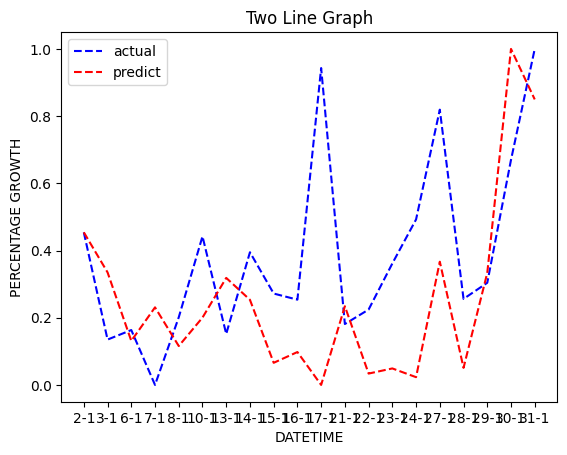

In [50]:
# Analysis of the difference between the predicted and actual percentage growth in stock value (graph)
predict_value = df[df['stock_name'] == 'MSFT']['predictions'].to_list()
actual_value = df[df['stock_name'] == 'MSFT']['actuals'].to_list()

# norm
price1_norm = (predict_value - np.min(predict_value)) / (np.max(predict_value) - np.min(predict_value))
price2_norm = (actual_value - np.min(actual_value)) / (np.max(actual_value) - np.min(actual_value))

df['date'] = df['day']+"-"+df['month']
date = df[df['stock_name'] == 'AAPL']['date'].to_list()

plt.plot(date, price1_norm, label="actual", color="blue", linestyle="--")  # First line
plt.plot(date, price2_norm, label="predict", color="red", linestyle="--")   # Second line

# Add labels and legend
plt.xlabel("DATETIME")
plt.ylabel("PERCENTAGE GROWTH")
plt.title("Two Line Graph")
plt.legend()